# Face Detection

## Haar Cascade
얼굴, 눈, 미소 감지

Viola-Jones Alogorithm

1. harr 학습분류기
2. harr 기능 선택
3. 일체형 이미지 생성
4. Adaboost 알고리즘 적용
5. 캐스케이드 분류기

## 모듈 추가

https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

In [1]:
import cv2
import numpy as np

# create face_cascade, eye_cascade objects
eye_cascade = cv2.CascadeClassifier('../data/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')

print(face_cascade, eye_cascade)

< cv2.CascadeClassifier 00000210D871E7F0> < cv2.CascadeClassifier 00000210DA437850>


## 얼굴 이미지 데이터 읽기

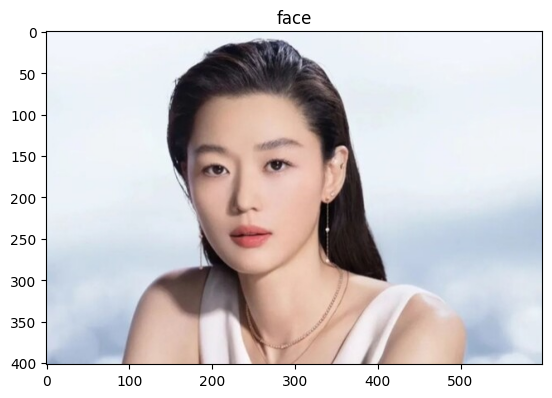

In [2]:
import matplotlib.pyplot as plt

img_path='./data/face.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def draw(img, str):
    plt.imshow(img)
    plt.title(str)
    plt.show()

draw(image,'face')

## 얼굴 정렬

- bounding box

face coordinate >> 144 84 203 203


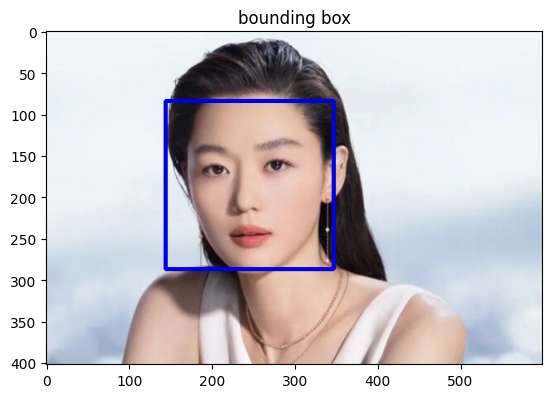

In [3]:
# face
#gray scale!!!!!!
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)   #double scaleFactor=1.1, int minNeighbors=4

for (x,y,w,h) in faces:
    print('face coordinate >>',x,y,w,h)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,225), 3)     #이미지,좌표, 높이/너비, 색상, ?

draw(image,'bounding box')

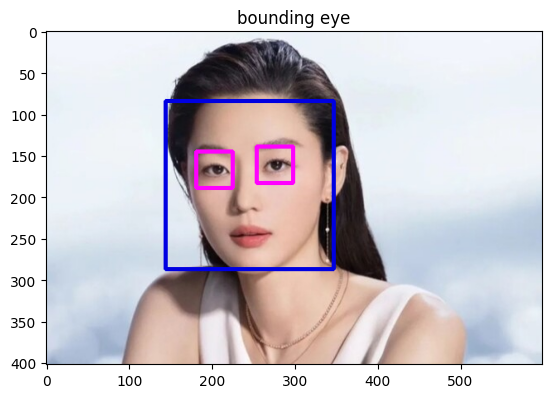

In [5]:
#eye
roi_gray = gray_image[y:(y+h), x:(x+w)]
roi_color = image[y:(y+h), x:(x+w)]

eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index = 0

#눈은 2개니까 eye_1, eye_2 변수에 저장
for (ex,ey,ew,eh) in eyes:
    if index == 0:
        eye_1 = (ex,ey,ew,eh)
    elif index ==1:
        eye_2 = (ex,ey,ew,eh)
    
    #drawing rectangle
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,0,255), 3)

    index +=1

draw(image, 'bounding eye')

- 눈 각도로 이미지 회전

In [6]:
if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

print("left eye",left_eye)
print("right eye",right_eye)

left eye (37, 61, 44, 44)
right eye (110, 55, 44, 44)


In [ ]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), )